# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# additional imports if necessary
from sklearn.model_selection import train_test_split
from scipy.stats import norm

### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [2]:
# your code here
def estimate_gaussian_paras(X, y):
    shape = X.shape
    mean = np.zeros((len(np.unique(y)), shape[1]))
    var = mean.copy()
    
    for ind, cl in enumerate(np.unique(y)):
        mat = X[y==cl]
        mean[ind, :] = np.mean(mat, axis=0)
        var[ind, :] = np.var(mat, axis=0)
        
    return mean, var

### Calculate priors

Write a function to calculate the priors for each class.

In [3]:
# your code here
def est_priors(X,y):
#     p = np.zeros(len(np.unique(y)))
    p = list()
    
    for ind, cl in enumerate(np.unique(y)):
        mat = X[y==cl]
        mat = mat.shape[0]
        mat = mat / X.shape[0]
        p.append(mat)
    p = np.array(p)
    return p

### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

In [4]:
# your code here
def est_likelihoods(X, classes, mean, var, priors):
    shape1 = X.shape
    shape2 = classes.shape
    
    p = np.zeros((shape1[0], shape2[0]))
    for ind, cl in enumerate(classes):
        x = np.sum(np.log(1 / np.sqrt(2 * np.pi * var[i, :])) - (X - mean[i, :]) ** 2 / (2 * var[i, :]), axis=1) + np.log(prior[i])
        prior_val = np.log(priors[ind])
        a = np.log(1/np.sqrt(2*np.pi*var[ind, :]))
        b = np.square((X - mean[ind, :])) / (2 * var[ind, :])
        val = np.sum(a-b, axis=1)
        val += prior_val
        p[:, ind] = val
    y_pred = classes[np.argmax(p, axis=1)]
    return y_pred

In [5]:
def better_likelihoods(X, classes, mean, var, priors):
    shape1 = X.shape
    shape2 = classes.shape
    
    p = np.zeros((shape1[0], shape2[0]))
    for ind, cl in enumerate(classes):
#         a = norm.pdf(X, mean[ind, :])
        a = np.sqrt(var[ind, :] + 1e-12)
        b = norm.pdf(X, mean[ind, :], a)
        val = np.sum(np.log(b), axis=1)
        p[:, ind] = val
    y_pred = classes[np.argmax(p, axis=1)]
    return y_pred

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [6]:
data = pd.read_csv('wifiLocalization.txt', sep='\t')

In [7]:
# your code here
data.describe()

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,r
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


In [8]:
# data.head()

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [9]:
# your code here
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_test.shape)

(1400, 7)
(600,)


### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

In [10]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Experiment 1

In [70]:
# your code here
class GaussNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        
    def fit(self, X, y):
        self.mean, self.var = estimate_gaussian_paras(X, y)
        self.prior = est_priors(X, y)
        self.classes = y
        self.classes = np.unique(self.classes)
        
    def predict(self, X):
        return better_likelihoods(X, self.classes, self.mean, self.var, self.prior)
    
    def plot_distributions(self, X, y, X_mis=None):
        # plot the distributions for each class and featuere pair
        ## Plot one graph for each class having 7 distributions (one for each feature)

        # get the unique classes
        classes = np.unique(y)

        # get the number of features
        n_features = X.shape[1]
        fig, axs = plt.subplots(len(classes), n_features, figsize=(20, 3*len(classes)))

        # create a figure with 7 subplots (one for each feature) for each class
        for j,c in enumerate(classes):
            for i in range(n_features):
                # plot the gaussian distribution for each feature using the mean and variance
                feature = X[:, i]

                # get the mean and variance for the current class and feature
                mean = self.mean[j, i]
                std = np.sqrt(self.var[j, i])

                # plot the distribution
                x =  np.linspace(np.min(feature), np.max(feature), 50)
                pdf = norm.pdf(x, mean, std)
                axs[j][i].plot(x, pdf)
                axs[j][i].set_title(f'Class {c}, Feature {i+1}')
                
                if X_mis is not None:
                    pdf_2 = norm.pdf(X_mis[:, i], mean, std)
                    axs[j][i].scatter(X_mis[:, i], pdf_2, color='red', marker='x', s=100)
                
        fig.text(0.5, 0.04, 'Feature Value', ha='center')
        fig.text(0.04, 0.5, 'Probability Density', va='center', rotation='vertical')
        fig.suptitle('Class Distributions by Feature')

        plt.show() 

In [71]:
def gaussian_NB(x_tr, x_te, y_tr, y_te):
    gnb = GaussNB()
    gnb.fit(x_tr, y_tr)
    y_pred = gnb.predict(x_tr)
    total_cor = np.sum(y_pred == y_tr)
    accuracy = total_cor / y_pred.shape[0]
    print("Training accuracy: ", accuracy)

    y_pred = gnb.predict(x_te)
    total_cor = np.sum(y_pred == y_te)
    accuracy = total_cor / y_pred.shape[0]
    print("Testing accuracy: ", accuracy)
    
    return gnb, y_pred
    
gnb, y_pred = gaussian_NB(X_train, X_test, y_train, y_test)

Training accuracy:  0.9821428571428571
Testing accuracy:  0.9833333333333333


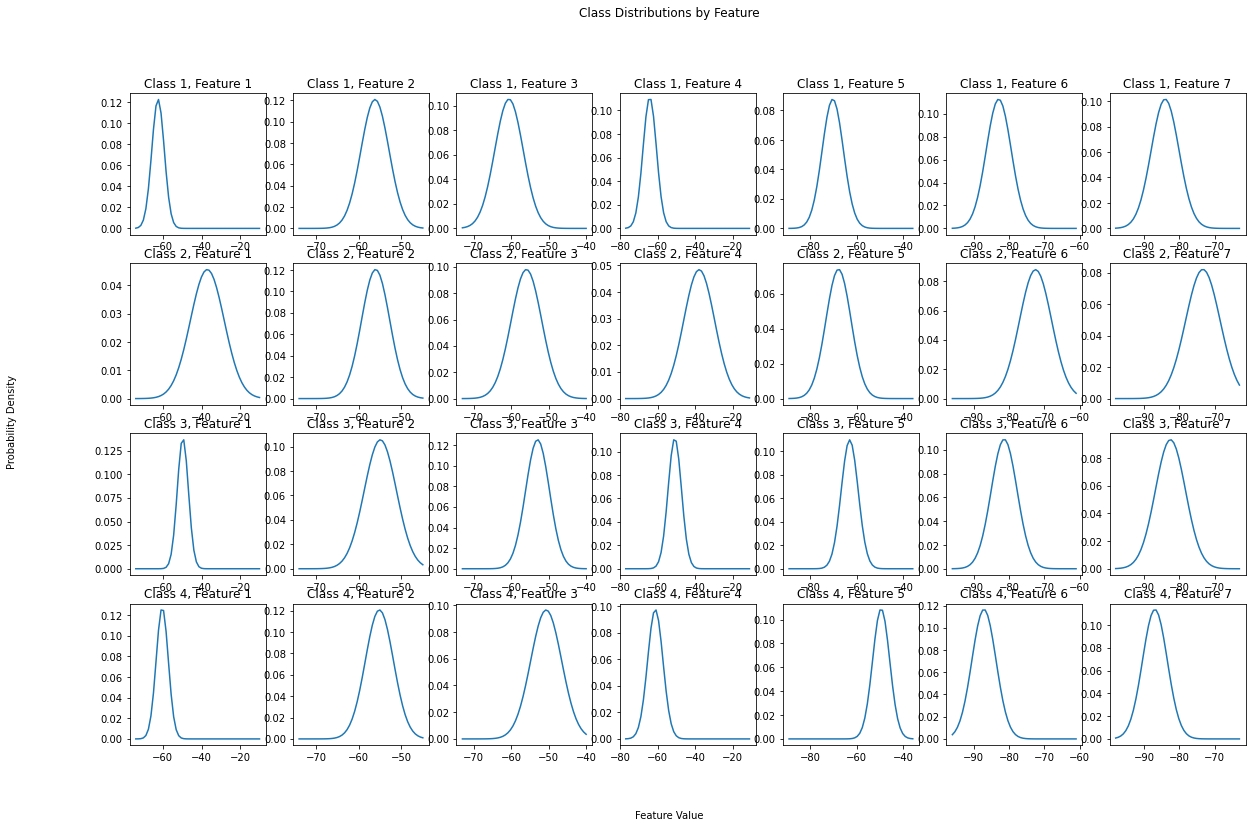

In [64]:
gnb.plot_distributions(X_train, y_train)

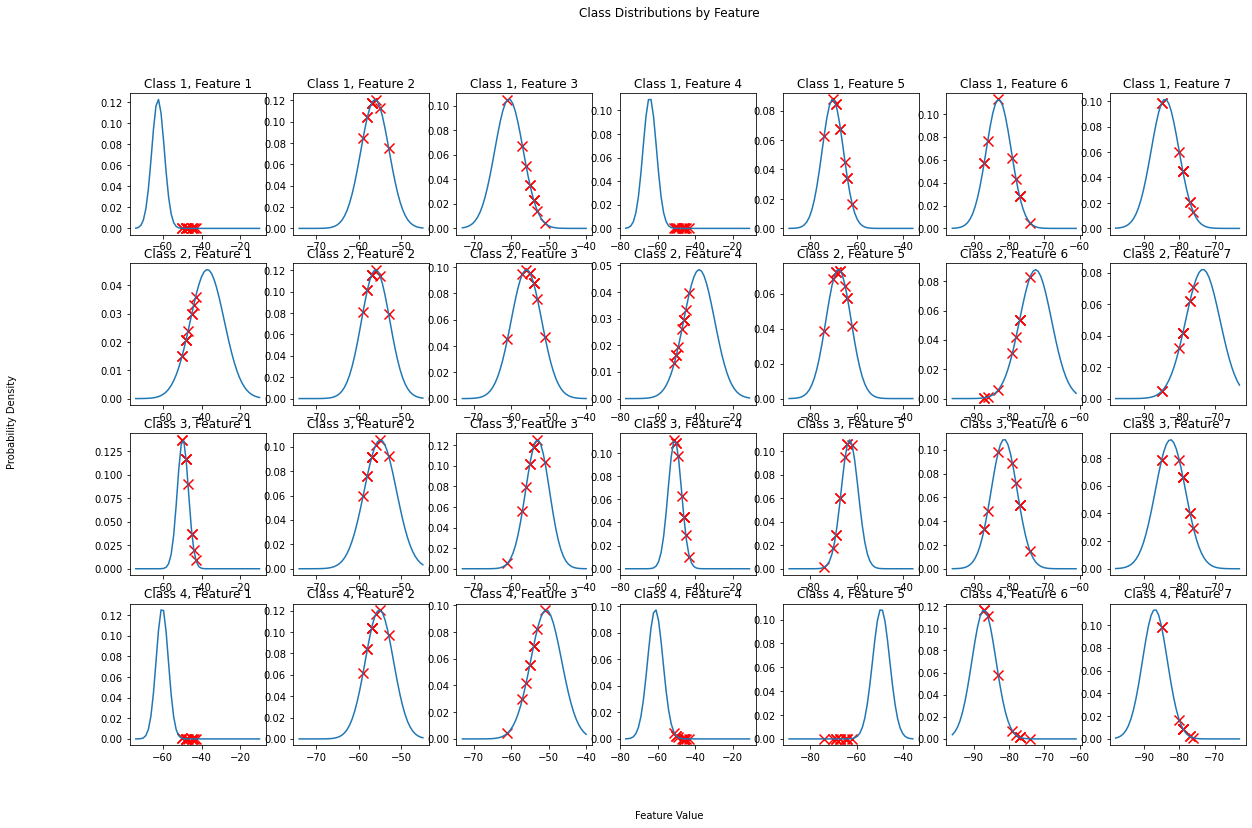

In [73]:
gnb.plot_distributions(X_train, y_train, X_test[y_pred != y_test])

In [76]:
# Get the predicted and true labels for the misclassified test points
y_pred_mis = y_pred[y_pred != y_test]
y_true_mis = y_test[y_pred != y_test]

X_mis = X_test[y_pred != y_test]
l = X_mis.shape[0]
# Print the misclassified test points along with the predicted and true labels
for i in range(l):
    print('Point {}: {}'.format(i+1, X_mis[i]))
    print('Predicted Label: {}'.format(y_pred_mis[i]))
    print('True Label: {}'.format(y_true_mis[i]))
    print('')

Point 1: [-50 -57 -57 -50 -70 -77 -80]
Predicted Label: 3
True Label: 2

Point 2: [-48 -56 -55 -46 -65 -86 -79]
Predicted Label: 3
True Label: 2

Point 3: [-45 -59 -54 -51 -69 -77 -85]
Predicted Label: 3
True Label: 2

Point 4: [-48 -53 -51 -43 -64 -74 -77]
Predicted Label: 2
True Label: 3

Point 5: [-43 -55 -54 -47 -67 -77 -79]
Predicted Label: 3
True Label: 2

Point 6: [-44 -57 -53 -46 -67 -78 -79]
Predicted Label: 3
True Label: 2

Point 7: [-47 -58 -55 -45 -62 -79 -85]
Predicted Label: 3
True Label: 2

Point 8: [-48 -57 -56 -49 -64 -87 -76]
Predicted Label: 3
True Label: 2

Point 9: [-50 -57 -61 -50 -74 -83 -79]
Predicted Label: 3
True Label: 2

Point 10: [-45 -58 -54 -46 -69 -87 -77]
Predicted Label: 3
True Label: 2



### Experiment 5

To check for redundant features, we will try and find those features which have high correlation with each other, and hence having both of them is not necessary for the performance of our algorithm.

In [13]:
data.head()

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,r
0,-47,-53,-54,-49,-63,-88,-85,3
1,-50,-57,-60,-43,-66,-77,-82,3
2,-44,-50,-57,-45,-61,-72,-67,2
3,-48,-59,-53,-45,-74,-81,-81,3
4,-60,-54,-59,-65,-66,-83,-84,1


In [14]:
corr = data[data.columns[:-1]].corr()
corr

,ws1,ws2,ws3,ws4,ws5,ws6,ws7
ws1,1.000000,-0.003298,0.050814,0.921025,-0.244932,0.718429,0.686955
ws2,-0.003298,1.000000,0.282211,0.014604,0.200469,0.074002,0.048336
ws3,0.050814,0.282211,1.000000,0.078292,0.618984,-0.091622,-0.073141
ws4,0.921025,0.014604,0.078292,1.000000,-0.236021,0.706039,0.673294
ws5,-0.244932,0.200469,0.618984,-0.236021,1.000000,-0.416049,-0.361621
ws6,0.718429,0.074002,-0.091622,0.706039,-0.416049,1.000000,0.723172
ws7,0.686955,0.048336,-0.073141,0.673294,-0.361621,0.723172,1.000000


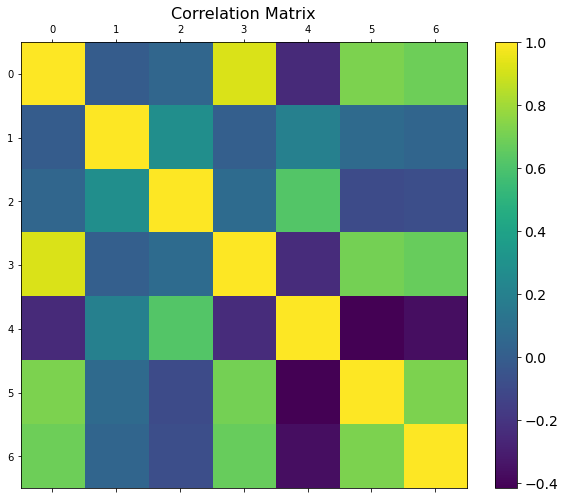

In [15]:
f = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=f.number)
# plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

**Observations**
ws 1,4,6,7 are highly correlated. ws 3,5 are correlated. ws 4,6,7 are correlated.

we can remove 4,6,7 as they are correlated with 1 and 5 as it is correlated with 3.

In [16]:
X_train_new = X_train[:, :-4]
X_test_new = X_test[:, :-4]

gaussian_NB(X_train_new, X_test_new, y_train, y_test)

Training accuracy:  0.895
Testing accuracy:  0.9216666666666666


We are still getting a pretty good accuracy.

### Experiment 6

We will have to calculate the importance of each feature, and see which contributes most to the dataset.

Feature name: 0; Importance: 0.8250663134558456
Feature name: 1; Importance: 0.0
Feature name: 2; Importance: 0.29849849909875026
Feature name: 3; Importance: 0.7373878292108103
Feature name: 4; Importance: 0.5984059859216979
Feature name: 5; Importance: 0.44059614799712943
Feature name: 6; Importance: 0.38186301089977004


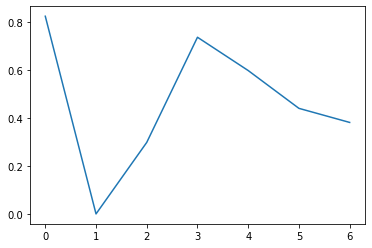

In [17]:
from sklearn.feature_selection import mutual_info_classif
info = mutual_info_classif(data[data.columns[:-1]], data['r'])

for ind, i in enumerate(info):
    print(f"Feature name: {ind}; Importance: {i}")

x = [i for i in range(len(info))]
plt.plot(x, info)
plt.show()

ws1 and ws4 seem to be the most overpowering.

In [18]:
gaussian_NB(X_train[:, [0,3]], X_test[:, [0,3]], y_train, y_test)

Training accuracy:  0.8042857142857143
Testing accuracy:  0.7883333333333333


We get a pretty decent accuracy even with just 2 features. 

Now let us experiement with features that have low overpowering value.

In [19]:
gaussian_NB(X_train[:, [1,2]], X_test[:, [1,2]], y_train, y_test)

Training accuracy:  0.5257142857142857
Testing accuracy:  0.5166666666666667


Bad accuracy is seen.

### Experiment 7

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_train)
total_cor = np.sum(y_pred == y_train)
accuracy = total_cor / y_pred.shape[0]
print("Training accuracy: ", accuracy)

y_pred = gnb.predict(X_test)
total_cor = np.sum(y_pred == y_test)
accuracy = total_cor / y_pred.shape[0]
print("Testing accuracy: ", accuracy)

Training accuracy:  0.9821428571428571
Testing accuracy:  0.9833333333333333
